In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras import regularizers

In [2]:
train_dir = '/kaggle/input/fruit-classification10-class/MY_data/train'
validation_dir = '/kaggle/input/fruit-classification10-class/MY_data/test'
pred_dir = '/kaggle/input/fruit-classification10-class/MY_data/predict'

In [3]:

#Data Generator

#Performing some operations for more data from a single picture
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,             #if you want to divide test and validation then add parameter: validation_split=0.2, 8-2 split
                                    fill_mode='nearest')

#We can provide same eefects to test datagen but no need as we are only testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                          train_dir,               # This is the source directory for training images
                          target_size=(150, 150),  # All images will be resized to 150x150
                          batch_size=20,           # Since we use binary_crossentropy loss, we need binary labels
                          class_mode='binary')     #For categorical use categorical in class mode
                          #subset='training')      #set as training data in case you have added validation split in the datagen

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150, 150),
                          batch_size=20,
                          class_mode='binary')
                          #subset='validation')   

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [4]:
#Model Making

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),    #Change the shape as your requirement
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.2),                       #Helps to avoid overfitting of model by dropping some weights
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')      #Sigmoid is used data is in binary form for categorical use softmax
])


#Compile Model

model.compile(loss='binary_crossentropy',               #For categorical use categorical)crossentropy
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  #steps = total_image_train / batch_size
      epochs=10,            #No of epochs
      validation_data=validation_generator,
      validation_steps=50)  #steps = total_image_test / batch_size

Epoch 1/10
100/100 [==============================] - 58s 565ms/step - loss: -38081474560.0000 - accuracy: 0.0954 - val_loss: -216247517184.0000 - val_accuracy: 0.1030
Epoch 2/10
100/100 [==============================] - 54s 535ms/step - loss: -1628838297600.0000 - accuracy: 0.0999 - val_loss: -5085722574848.0000 - val_accuracy: 0.1020
Epoch 3/10
100/100 [==============================] - 53s 532ms/step - loss: -15693987708928.0000 - accuracy: 0.1005 - val_loss: -36304913956864.0000 - val_accuracy: 0.1030
Epoch 4/10
100/100 [==============================] - 53s 527ms/step - loss: -79211335254016.0000 - accuracy: 0.0999 - val_loss: -154791913193472.0000 - val_accuracy: 0.1010
Epoch 5/10
100/100 [==============================] - 54s 539ms/step - loss: -281234794086400.0000 - accuracy: 0.1010 - val_loss: -484477243490304.0000 - val_accuracy: 0.1030
Epoch 6/10
100/100 [==============================] - 54s 538ms/step - loss: -764636584476672.0000 - accuracy: 0.0995 - val_loss: -12403538

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

# Predict the classes for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes
y_true = validation_generator.classes

# Calculate sample weights
sample_weights = compute_sample_weight('balanced', y_true)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred_classes, average='weighted', sample_weight=sample_weights, zero_division=0)


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


52/52 [==============================] - 7s 129ms/step
Accuracy: 0.0868
Precision: 0.0075
Recall: 0.0868
F1 Score: 0.0182


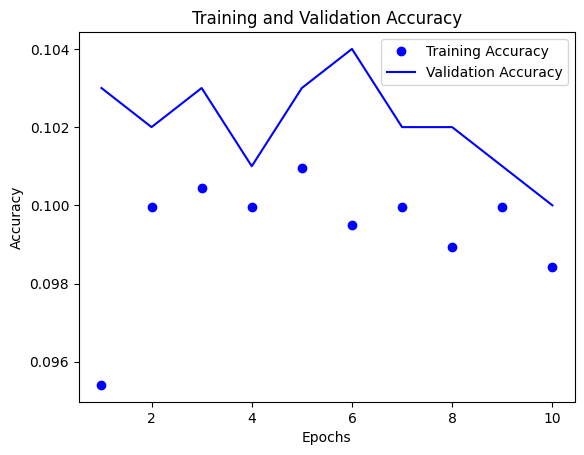

In [7]:
# Mendapatkan riwayat akurasi dan kerugian
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Membuat plot akurasi
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan plot
plt.show()